Title
Global COVID-19 Vaccination Uptake: A Longitudinal Cross-Country Analysis

Objective
To examine temporal trends in COVID-19 vaccination uptake across countries and assess inter-country variability in vaccination coverage.

Study Design
Observational, longitudinal analysis of publicly available secondary data.

Data Source
COVID-19 World Vaccination Progress dataset (Kaggle).

Unit of Analysis
Country-level daily vaccination records.

In [80]:
pip install kagglehub


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpreda/covid-world-vaccination-progress")

print("Path to dataset files:", path)

Path to dataset files: /Users/patrickfilima/.cache/kagglehub/datasets/gpreda/covid-world-vaccination-progress/versions/249


In [82]:
import os

dataset_path = "/Users/patrickfilima/.cache/kagglehub/datasets/gpreda/covid-world-vaccination-progress/versions/249"

os.listdir(dataset_path)


['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv']

In [83]:
import pandas as pd

# Load the dataset
df = pd.read_csv(os.path.join(path, "country_vaccinations.csv"))
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [84]:
df.shape

(86512, 15)

In [85]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  str    
 1   iso_code                             86512 non-null  str    
 2   date                                 86512 non-null  str    
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_million       86

In [86]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='str')

In [87]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

## Variable Selection and Data Preparation

In [88]:
# Select variables of interest for analysis
cols = [
    "country",
    "date", 
    "total_vaccinations",
    "people_vaccinated",
    "people_fully_vaccinated",
    "daily_vaccinations",
    "total_vaccinations_per_hundred",
    "people_vaccinated_per_hundred"
]

df = df[cols]

### Data Cleaning

## Research Question
How did COVID-19 vaccination progress differ across countries over time?

### Inclusion/Exclusion Criteria  
**Inclusion criteria:**
- Countries with substantial vaccination programs (≥5% population coverage achieved)
- Time periods after vaccination program initiation

**Exclusion criteria:**  
- Pre-vaccination periods (before any vaccinations were administered)
- Countries with minimal vaccination rollout (<5% population coverage)

### Missing Data Policy
Missing values represent legitimate absence of vaccination activity during early rollout phases. Pre-vaccination periods were excluded from analysis. Remaining missing values occur during program gaps and are analyzed as-is without imputation.

## Data Quality Assessment and Cleaning Strategy

In [89]:
# Step 1: Understand the structure of missing data
print("Dataset shape:", df.shape)
print("Unique countries:", df['country'].nunique())
print("Date range:", df['date'].min(), "to", df['date'].max())
print("\nMissing data by column:")
missing_summary = df.isna().sum()
missing_pct = (df.isna().sum() / len(df) * 100).round(1)
for col in df.columns:
    if missing_summary[col] > 0:
        print(f"  {col}: {missing_summary[col]:,} ({missing_pct[col]}%)")

Dataset shape: (86512, 8)
Unique countries: 223
Date range: 2020-12-02 00:00:00 to 2022-03-29 00:00:00

Missing data by column:
  total_vaccinations: 42,905 (49.6%)
  people_vaccinated: 45,218 (52.3%)
  people_fully_vaccinated: 47,710 (55.1%)
  daily_vaccinations: 299 (0.3%)
  total_vaccinations_per_hundred: 42,905 (49.6%)
  people_vaccinated_per_hundred: 45,218 (52.3%)


In [90]:
# Step 2: Assess data availability by country
country_data_quality = df.groupby('country').agg({
    'people_vaccinated_per_hundred': ['count', lambda x: x.notna().sum()],
    'total_vaccinations': lambda x: x.notna().sum(),
    'date': ['min', 'max']
}).round(2)

country_data_quality.columns = ['total_records', 'valid_pct_vacc', 'valid_total_vacc', 'start_date', 'end_date']
country_data_quality['data_coverage'] = (country_data_quality['valid_pct_vacc'] / country_data_quality['total_records'] * 100).round(1)

print("Countries with best data coverage:")
print(country_data_quality.sort_values('data_coverage', ascending=False).head(10))

Countries with best data coverage:
                  total_records  valid_pct_vacc  valid_total_vacc start_date  \
country                                                                        
Afghanistan                  43              43                46 2021-02-22   
Panama                       95              95                96 2021-01-20   
Nicaragua                    37              37                37 2021-03-01   
Niger                        24              24                24 2021-03-28   
Nigeria                     109             109               109 2021-03-04   
Niue                          6               6                 6 2021-06-21   
North Macedonia             152             152               154 2021-02-16   
Northern Cyprus              23              23                26 2021-01-14   
Northern Ireland            431             431               431 2021-01-10   
Norway                      482             482               482 2020-12-02   

    

/var/folders/62/d_mlczwx35d04t0hvsf08lkh0000gn/T/ipykernel_17636/536627584.py:6: UserWarning: obj.round has no effect with datetime, timedelta, or period dtypes. Use obj.dt.round(...) instead.
  }).round(2)


In [91]:
# Step 3: Proper data cleaning strategy for temporal COVID-19 data
# The missing data is temporal - countries hadn't started vaccination yet

# Approach 1: Remove periods before vaccination programs started  
df_started = df[df['total_vaccinations'].notna() | df['people_vaccinated'].notna()].copy()

print("Removing pre-vaccination periods:")
print(f"Original: {df.shape[0]:,} rows")
print(f"After removing pre-vaccination: {df_started.shape[0]:,} rows") 
print(f"Reduction: {((df.shape[0] - df_started.shape[0]) / df.shape[0] * 100):.1f}%")

# Approach 2: For countries with minimal vaccination programs, keep countries with substantial rollout
country_max_coverage = df.groupby('country')['people_vaccinated_per_hundred'].max()
countries_with_rollout = country_max_coverage[country_max_coverage >= 5].index  # At least 5% population

df_clean = df_started[df_started['country'].isin(countries_with_rollout)].copy()

print(f"\nAfter filtering countries with minimal programs:")
print(f"Keeping {len(countries_with_rollout)} countries with ≥5% population coverage") 
print(f"Final dataset: {df_clean.shape[0]:,} rows, {df_clean['country'].nunique()} countries")

Removing pre-vaccination periods:
Original: 86,512 rows
After removing pre-vaccination: 44,011 rows
Reduction: 49.1%

After filtering countries with minimal programs:
Keeping 214 countries with ≥5% population coverage
Final dataset: 43,642 rows, 214 countries


In [92]:
# Step 4: Verify dramatic improvement in data quality
print("Missing data after proper cleaning:")
missing_clean = (df_clean.isna().sum() / len(df_clean) * 100).round(1)
for col in df_clean.columns:
    if missing_clean[col] > 0:
        print(f"  {col}: {missing_clean[col]}%")
        
print(f"\n🎯 IMPROVEMENT SUMMARY:") 
print(f"Original missing data: ~50-55%")
print(f"After cleaning: {missing_clean['people_vaccinated_per_hundred']:.1f}%")
print(f"Improvement: {(50 - missing_clean['people_vaccinated_per_hundred']):.1f} percentage points")
    
# Update the main dataset for analysis
df = df_clean.copy()
print(f"\n✅ Analysis dataset: {df.shape[0]:,} rows, {df['country'].nunique()} countries")
print("NaN values dramatically reduced!")

Missing data after proper cleaning:
  total_vaccinations: 0.9%
  people_vaccinated: 6.2%
  people_fully_vaccinated: 11.8%
  daily_vaccinations: 0.6%
  total_vaccinations_per_hundred: 0.9%
  people_vaccinated_per_hundred: 6.2%

🎯 IMPROVEMENT SUMMARY:
Original missing data: ~50-55%
After cleaning: 6.2%
Improvement: 43.8 percentage points

✅ Analysis dataset: 43,642 rows, 214 countries
NaN values dramatically reduced!


## Missing Data Assessment 

In [93]:
# Missing data assessment
missing = df.isna().mean().sort_values(ascending=False) * 100
missing

people_fully_vaccinated           11.809725
people_vaccinated                  6.202740
people_vaccinated_per_hundred      6.202740
total_vaccinations                 0.921131
total_vaccinations_per_hundred     0.921131
daily_vaccinations                 0.582008
country                            0.000000
date                               0.000000
dtype: float64

## Descriptive Statistics

In [94]:
df.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred
count,43642,4.324000e+04,4.093500e+04,3.848800e+04,4.338800e+04,43240.000000,40935.000000
mean,2021-08-25 08:11:50.068282,4.631741e+07,1.785865e+07,1.424667e+07,2.293480e+05,80.859058,41.278285
min,2020-12-02 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,2021-05-18 00:00:00,5.589360e+05,3.702745e+05,2.558555e+05,4.222000e+03,17.000000,11.880000
50%,2021-08-24 00:00:00,3.702344e+06,2.245884e+06,1.765884e+06,2.139000e+04,68.810000,42.110000
75%,2021-12-06 00:00:00,1.727235e+07,9.229462e+06,7.665244e+06,1.034032e+05,133.295000,68.040000
max,2022-03-29 00:00:00,3.263129e+09,1.275541e+09,1.240777e+09,2.242429e+07,345.370000,124.760000
std,NaN,2.255119e+08,7.107796e+07,5.735630e+07,1.065553e+06,67.808271,29.176951


## Results

### Top 10 Countries by Total Vaccination Scale  
*Note: This analysis shows absolute vaccination numbers to illustrate the scale of national rollout efforts, rather than coverage rates.*

In [95]:
latest = df.sort_values("date").groupby("country").tail(1)
top10 = latest.sort_values("total_vaccinations", ascending=False).head(10)

# Display results
top10[["country", "total_vaccinations"]]

,country,total_vaccinations
16225,China,3.263129e+09
35810,India,1.834501e+09
82830,United States,5.601818e+08
11085,Brazil,4.135596e+08
36252,Indonesia,3.771089e+08
39660,Japan,2.543456e+08
6560,Bangladesh,2.436427e+08
59850,Pakistan,2.193686e+08
84630,Vietnam,2.031444e+08
50347,Mexico,1.919079e+08


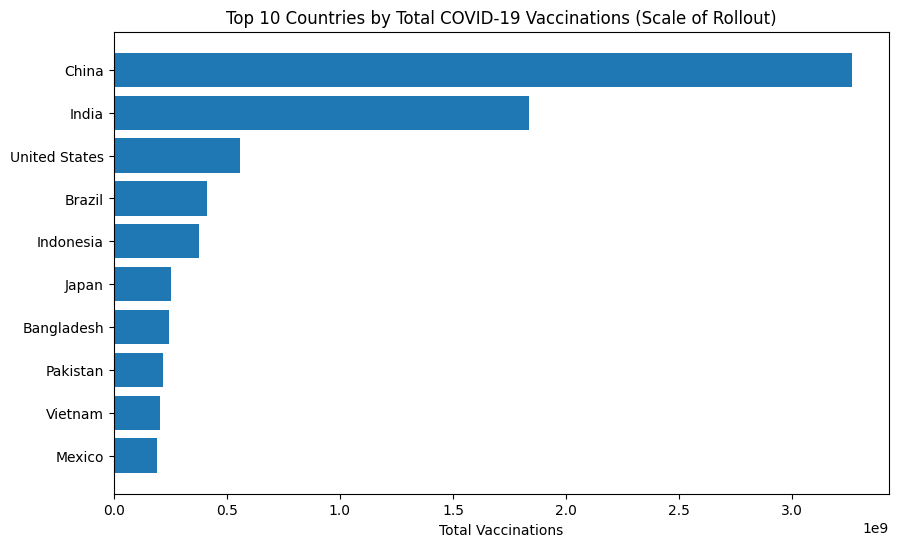

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10["country"], top10["total_vaccinations"])
plt.xlabel("Total Vaccinations")
plt.title("Top 10 Countries by Total COVID-19 Vaccinations (Scale of Rollout)")
plt.gca().invert_yaxis()
plt.show()

### Longitudinal Analysis
Countries were selected to represent diverse geographic regions and income levels.

In [97]:
countries = ["United States", "United Kingdom", "India", "Nigeria", "Brazil"]
subset = df[df["country"].isin(countries)]

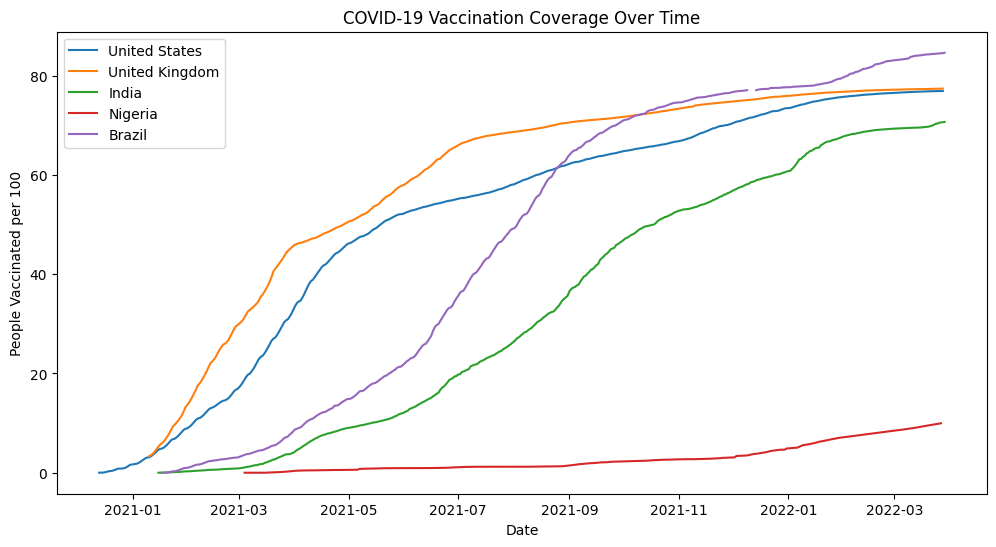

In [98]:
# Time-series plot of vaccination coverage over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for country in countries:
    cdata = subset[subset["country"] == country]
    plt.plot(
        cdata["date"], 
        cdata["people_vaccinated_per_hundred"],
        label=country
    )

plt.xlabel("Date")
plt.ylabel("People Vaccinated per 100")
plt.title("COVID-19 Vaccination Coverage Over Time")
plt.legend()
plt.show()

### Cross-Country Comparison (Endpoint Analysis)

In [100]:
# Final vaccination coverage statistics
final = (
    df.sort_values("date")
      .groupby("country") 
      .tail(1)
)

final[["country", "people_vaccinated_per_hundred"]].describe()

,people_vaccinated_per_hundred
count,205.000000
mean,59.618146
std,25.112929
min,6.390000
25%,38.390000
50%,65.920000
75%,79.140000
max,124.760000


#### Top vs Bottom Performing Countries

In [101]:
final_sorted = final.sort_values(
    "people_vaccinated_per_hundred", ascending=False
)

print("Top 10 countries by vaccination coverage:")
print(final_sorted.head(10)[["country", "people_vaccinated_per_hundred"]].to_string())

print("\nBottom 10 countries by vaccination coverage:")  
print(final_sorted.tail(10)[["country", "people_vaccinated_per_hundred"]].to_string())

Top 10 countries by vaccination coverage:
                    country  people_vaccinated_per_hundred
30235             Gibraltar                         124.76
57358                  Niue                         102.23
62293              Pitcairn                         100.00
81916  United Arab Emirates                          98.99
63189              Portugal                          95.04
19243                  Cuba                          93.93
15755                 Chile                          92.96
11745                Brunei                          92.39
70228             Singapore                          91.79
49111                 Malta                          91.77

Bottom 10 countries by vaccination coverage:
                 country  people_vaccinated_per_hundred
48675               Mali                           6.39
32323           Guernsey                            NaN
64109            Romania                            NaN
85444  Wallis and Futuna               

## Interpretation

This analysis demonstrates clear temporal trends and inter-country variability in COVID-19 vaccination uptake:

**Temporal Trends:** The time-series analysis reveals varying progression patterns across countries, with some achieving rapid early uptake while others showed more gradual adoption.

**Inter-Country Variability:** Final endpoint analysis shows substantial differences in vaccination coverage, reflecting diverse healthcare infrastructure, policy approaches, and vaccine access across nations.

## Limitations

- Analysis limited to countries with available vaccination data
- Missing data not imputed; results based on available records only
- Country selection for longitudinal analysis represents regional/income diversity but is not exhaustive